# Dataset Description
The dataset for this analysis is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

Date, time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â °C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

## Importing important modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Loading the dataset and EDA 

In [2]:
#load the dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#the total rows and columns in the dataset
df.shape

(19735, 29)

In [4]:
#view each feature in the dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
#view the datatypes of each features 
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

### Observation
This showed that there is only one categorical feature while the rest are numerical features 

In [6]:
#to calculate the various statistical measurement of the entire dataset
df.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-04-12 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [7]:
# Checking for missing values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:>

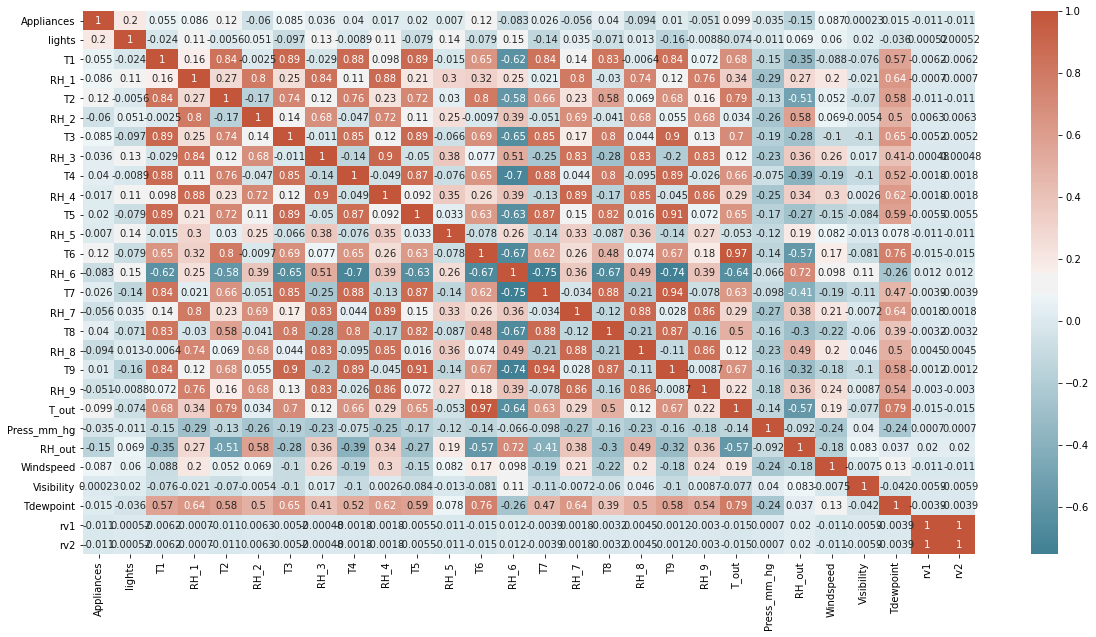

In [8]:
#plot a heat map to show the correlation relationships
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(20,10))
corr= df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220, 20, as_cmap=True))


## Data Preprocessing

In [9]:
# the date would be dropped because this is not a time series analysis therefore it is not needed
# the light column would also be dropped as it provides information already covered in the appliances column 
df = df.drop(columns = ['date', 'lights'])
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [10]:
#Applying MinMaxScaler to scale the dataset

#import the scaler
from sklearn.preprocessing import MinMaxScaler

#initiate the scaler 
scaler = MinMaxScaler()

#normalizing the dataset
normalized_df = scaler.fit_transform(df)

#put the normalized dataset into a dataframe 
dataset = pd.DataFrame(normalized_df, columns = df.columns)

#view the dataset
dataset.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [11]:
#split the dataset into feature(independent) and target(dependent) variables 

#feature(predictors)
features = dataset.drop(['Appliances'], axis=1)

#target(response variable)
targets = dataset['Appliances']

features.head(),  targets.head()

(        T1      RH_1        T2      RH_2        T3      RH_3        T4  \
 0  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066  0.351351   
 1  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871  0.351351   
 2  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569  0.344745   
 3  0.32735  0.524080  0.225345  0.678414  0.215188  0.758685  0.341441   
 4  0.32735  0.531419  0.225345  0.676727  0.215188  0.758685  0.341441   
 
        RH_4        T5      RH_5  ...        T9      RH_9     T_out  \
 0  0.764262  0.175506  0.381691  ...  0.223032  0.677290  0.372990   
 1  0.782437  0.175506  0.381691  ...  0.226500  0.678532  0.369239   
 2  0.778062  0.175506  0.380037  ...  0.219563  0.676049  0.365488   
 3  0.770949  0.175506  0.380037  ...  0.219563  0.671909  0.361736   
 4  0.762697  0.178691  0.380037  ...  0.219563  0.671909  0.357985   
 
    Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
 0     0.097674  0.894737   0.500000  

In [12]:
#split the dataset into training and testing sets
#for this analysis we would be using the 70/30 split

#import necessary modules
from sklearn.model_selection import train_test_split 

#split the dataset
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state =42)

In [13]:
print(f'shape of training set is {x_train.shape}')
print(f'shape of testing set is {x_test.shape}')

shape of training set is (13814, 26)
shape of testing set is (5921, 26)


## Modelling 
The linear regression would first be used. 
Then Lasso and Ridge regression would be used to regularize the linear models as improvement to the linear regression.
This would be done several times with adjustments till a good model  is found.

## Linear Regression

In [14]:
#fit the model to the training dataset
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

#predicting the test values
y_pred = linear_model.predict(x_test)


### Measure regression performance
For this project R2 score and root means squared error would be used as the performance metrics

In [15]:
print('R2 score:  {}'.format(round(r2_score(y_test, y_pred), 4)))
print('RMSE score:{}'.format(round(np.sqrt(mean_squared_error(y_test,y_pred)), 4)))

R2 score:  0.1489
RMSE score:0.0875


In [16]:
#check the weight each feature had
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
        weights = pd.Series(model.coef_, feat.columns).sort_values(ascending=False)
        weights_df = pd.DataFrame(weights).reset_index()
        weights_df.columns = [ 'Features' , col_name]
        weights_df[col_name].round(3)
        return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )
linear_model_weights 

,Features,Linear_Model_Weight
0,RH_1,0.553547
1,T3,0.290627
2,T6,0.236425
3,Tdewpoint,0.117758
4,T8,0.101995
5,RH_3,0.096048
6,RH_6,0.038049
7,Windspeed,0.029183
8,T4,0.028981
9,RH_4,0.026386


## Rigde Regression
This would be used as a regularization method to improve the performance of the linear regression

In [17]:
#fit the model to the training dataset and predict the test data
from sklearn.model_selection import GridSearchCV
ridge_reg= Ridge()
parameter = {'alpha': np.logspace(-10,3,100)}
ridge_reg = GridSearchCV(ridge_reg, parameter, scoring='r2')
ridge_reg.fit(x_train,y_train)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-10, 1.35304777e-10, 1.83073828e-10, 2.47707636e-10,
       3.35160265e-10, 4.53487851e-10, 6.13590727e-10, 8.30217568e-10,
       1.12332403e-09, 1.51991108e-09, 2.05651231e-09, 2.78255940e-09,
       3.76493581e-09, 5.09413801e-09, 6.89261210e-09, 9.32603347e-09,
       1.26185688e-08, 1.70735265e-08, 2.31012970e-08, 3.12571...
       9.54548457e-01, 1.29154967e+00, 1.74752840e+00, 2.36448941e+00,
       3.19926714e+00, 4.32876128e+00, 5.85702082e+00, 7.92482898e+00,
       1.07226722e+01, 1.45082878e+01, 1.96304065e+01, 2.65608778e+01,
       3.59381366e+01, 4.86260158e+01, 6.57933225e+01, 8.90215085e+01,
       1.20450354e+02, 1.62975083e+02, 2.20513074e+02, 2.98364724e+02,
       4.03701726e+02, 5.46227722e+02, 7.39072203e+02, 1.00000000e+03])},
             scoring='r2')

In [18]:
#check for the best parameters
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.08497534359086473}
0.13993083364871678


In [19]:
ridge_reg_imp=Ridge(alpha=0.08498)
ridge_reg_imp.fit(x_train, y_train)
ridge_pred=ridge_reg_imp.predict(x_test)

### Ridge regression performance

In [20]:
print('R2 score:   {}'.format(round(r2_score(y_test, ridge_pred), 4)))
print('RMSE score: {}'.format(round(np.sqrt(mean_squared_error(y_test, ridge_pred)),4)))

R2 score:   0.1489
RMSE score: 0.0875


Observation: The ridge regression had no significant effect

## Lasso Regression

In [21]:
#fit the model to the training dataset and predict the test data
lasso_reg=Lasso(alpha=0.4)
parameter = {'alpha': np.logspace(-10,3,100)}
lasso_reg = GridSearchCV(lasso_reg, parameter, scoring='r2')
lasso_reg.fit(x_train,y_train)


/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.39422636609738, tolerance: 0.009995706212833454
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.73157832095623, tolerance: 0.010287717871529337
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.73076878157949, tolerance: 0.010085458977666965
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.83269236449969, tolerance: 0.010085458977666965
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.49362477520559, tolerance: 0.010619878709861044
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.74006213747736, tolerance: 0.010167974004971376
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.75169664595307, tolerance: 0.010167974004971376
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.384498221789656, tolerance: 0.009995706212833454
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.2947893627952, tolerance: 0.010287717871529337
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.047066551510795, tolerance: 0.010287717871529337
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.978429420841941, tolerance: 0.010085458977666965
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.510406417965697, tolerance: 0.010619878709861044
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7351074817422614, tolerance: 0.010619878709861044
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5672418978072642, tolerance: 0.010167974004971376
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.504251067838382, tolerance: 0.009995706212833454
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinat

/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027458458450453804, tolerance: 0.009995706212833454
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08268771420841858, tolerance: 0.010287717871529337
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07190263929354046, tolerance: 0.010085458977666965
  model = cd_fast.enet_coordinate_descent(
/home/jessica/.local/lib/python3.8/site-packages/sklearn/linear_model/_coor

GridSearchCV(estimator=Lasso(alpha=0.4),
             param_grid={'alpha': array([1.00000000e-10, 1.35304777e-10, 1.83073828e-10, 2.47707636e-10,
       3.35160265e-10, 4.53487851e-10, 6.13590727e-10, 8.30217568e-10,
       1.12332403e-09, 1.51991108e-09, 2.05651231e-09, 2.78255940e-09,
       3.76493581e-09, 5.09413801e-09, 6.89261210e-09, 9.32603347e-09,
       1.26185688e-08, 1.70735265e-08, 2.31012970e-0...
       9.54548457e-01, 1.29154967e+00, 1.74752840e+00, 2.36448941e+00,
       3.19926714e+00, 4.32876128e+00, 5.85702082e+00, 7.92482898e+00,
       1.07226722e+01, 1.45082878e+01, 1.96304065e+01, 2.65608778e+01,
       3.59381366e+01, 4.86260158e+01, 6.57933225e+01, 8.90215085e+01,
       1.20450354e+02, 1.62975083e+02, 2.20513074e+02, 2.98364724e+02,
       4.03701726e+02, 5.46227722e+02, 7.39072203e+02, 1.00000000e+03])},
             scoring='r2')

In [22]:
#check for the best parameters
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1.592282793341094e-06}
0.13993003310805047


In [23]:
lasso_reg_imp=Lasso(alpha=1.5923)
lasso_reg_imp.fit(x_train, y_train)
lasso_pred=lasso_reg_imp.predict(x_test)

In [24]:
lasso_reg_improved=Lasso(alpha=0.5923)
lasso_reg_improved.fit(x_train, y_train)
lasso_pred_imp=lasso_reg_improved.predict(x_test)

### Lasso regression performance

In [25]:
print('R2 score:   {}'.format(round(r2_score(y_test, lasso_pred), 4)))
print('RMSE score: {}'.format(round(np.sqrt(mean_squared_error(y_test, lasso_pred_imp)),4)))

R2 score:   -0.0
RMSE score: 0.0949


Observation: This is not a good model as the r2 scores and root mean scores accross all the regression were low, this could be due to several reasons for example, in this dataset, most of the features were not independent of each other i.e there is a strong correlation between some variables and also most of them were not needed in training the model as seen in the lasso weights below. 

#### Total weight of each regression

In [26]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name) :
#this function returns the weight of every feature
        weights = pd.Series(model.coef_, feat.columns).sort_values(ascending=False)
        weights_df = pd.DataFrame(weights).reset_index()
        weights_df.columns = [ 'Features' , col_name]
        weights_df[col_name].round(3)
        return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight' )
ridge_weights_df = get_weights_df(ridge_reg_imp, x_train, 'Ridge_Weight' )
lasso_weights_df = get_weights_df(lasso_reg_imp, x_train, 'Lasso_weight' )
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on= 'Features' )
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features' )
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_1,0.553547,0.545782,0.0
1,T3,0.290627,0.290115,0.0
2,T6,0.236425,0.231838,0.0
3,Tdewpoint,0.117758,0.108929,0.0
4,T8,0.101995,0.101811,0.0
5,RH_3,0.096048,0.095807,0.0
6,RH_6,0.038049,0.037419,-0.0
7,Windspeed,0.029183,0.029463,0.0
8,T4,0.028981,0.028630,0.0
9,RH_4,0.026386,0.025981,0.0


To improve the model, any weight that had less than 0.005 weight across the linear and ridge regression would be dropped fromthe normalized dataset

In [30]:
x_new = dataset.drop(columns = ['Appliances','rv1','rv2','T1'])
y_new = dataset['Appliances']

In [31]:
#split the dataset
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.3, random_state =42)


In [32]:
#Linear Regression
linear_model=LinearRegression()
linear_model.fit(x_new_train, y_new_train)
y_new_pred = linear_model.predict(x_new_test)
#performance metrics
print('R2 score:  {}'.format(round(r2_score(y_new_test, y_new_pred), 4)))
print('RMSE score:{}'.format(round(np.sqrt(mean_squared_error(y_new_test,y_new_pred)), 4)))

R2 score:  0.1492
RMSE score:0.0875


Observation: this had no significant effect on the model as shown by the r2 score. This implies that the dependent variable (appliances) cannot be properly explained by the independent variables. 